In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

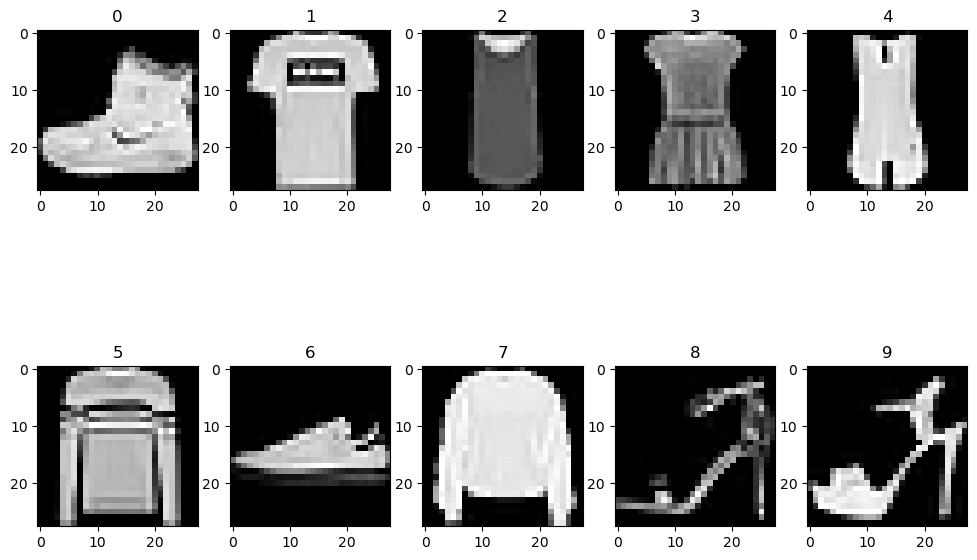

In [3]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(xtrain[i].reshape(28,28),cmap='gray')
    plt.title(i)

In [4]:
xtrain=xtrain/255.0
xtest=xtest/255.0
xtrain=xtrain.reshape(-1,28,28,1)
xtest=xtest.reshape(-1,28,28,1)

In [5]:
ytrain_cat=to_categorical(ytrain,10)
ytest_cat=to_categorical(ytest,10)

In [6]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

c:\Users\sanke\miniforge3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6519 - loss: 0.9891 - val_accuracy: 0.8474 - val_loss: 0.4174
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8364 - loss: 0.4605 - val_accuracy: 0.8712 - val_loss: 0.3545
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8618 - loss: 0.3824 - val_accuracy: 0.8871 - val_loss: 0.3158
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8768 - loss: 0.3451 - val_accuracy: 0.8911 - val_loss: 0.2996
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8802 - loss: 0.3322 - val_accuracy: 0.8965 - val_loss: 0.2791
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8950 - loss: 0.2940 - val_accuracy: 0.9002 - val_loss: 0.2727
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9001 - loss: 0.2773 - val_accuracy: 0.9054 - val_loss: 0.2572
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9051 - loss: 0.2679 - val_accu

In [10]:
loss,accuracy=model.evaluate(xtest,ytest_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8986 - loss: 0.2817


In [11]:
y_pred=model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [12]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

In [16]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [14]:
ytest_cat
ytest=np.argmax(ytest_cat,axis=1)
ytest

array([9, 2, 1, ..., 8, 1, 5])

In [17]:
cm=confusion_matrix(ytest,y_pred)

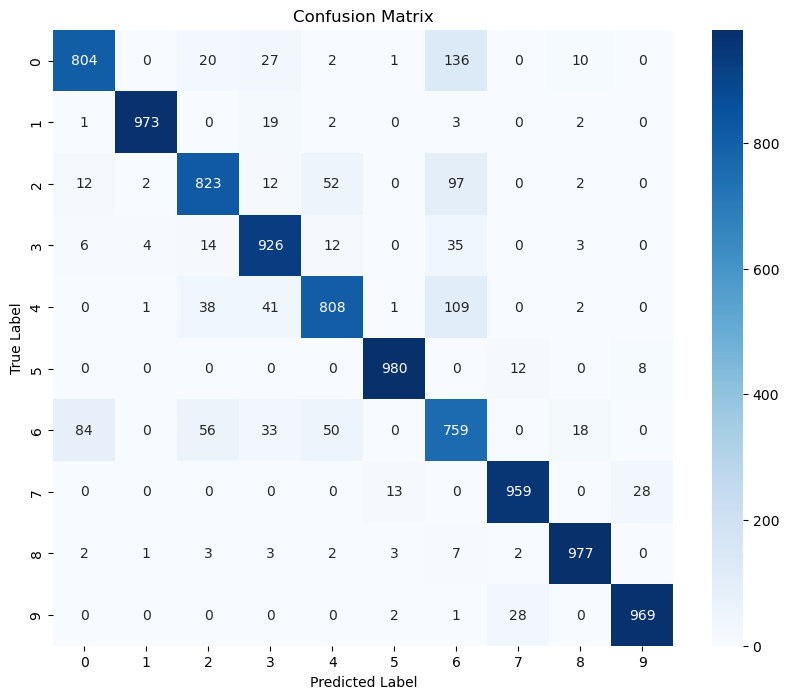

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.82      0.84      1000
           3       0.87      0.93      0.90      1000
           4       0.87      0.81      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.66      0.76      0.71      1000
           7       0.96      0.96      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

